In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# python 3.7
# pandas.__version__ = '0.25.3'
# numpy.__version__ = '1.17.3'
# matplotlib.__version__ = '3.1.1'
# seaborn.__version__ = '0.9.0'

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (40, 10)

In [3]:
os = pd.read_csv('os.csv')
rt = pd.read_csv('rich_tracks_2.csv')
ip = pd.read_csv('inc_points_2.csv')

In [4]:
pd.set_option('display.max_columns', 100)

In [5]:
# проверим данные
# сначала проверим os.csv
# наблюдаем, что в столбце os['DeviceToken'] есть неуникальные элементы
# т.е. в 'DeviceToken' есть элементы, которые одновренно и ios, и android

print('Количество уникальных элементов в столбце "DeviceToken": ', os['DeviceToken'].nunique()) 
print('Общее Количество элементов в столбце "DeviceToken": ', len(os['DeviceToken']))

Количество уникальных элементов в столбце "DeviceToken":  4395
Общее Количество элементов в столбце "DeviceToken":  4416


In [6]:
# добавим столбец 'frequency', в котором указана частота элемента в 'DeviceToken' 
os = os.assign(frequency=os.groupby('DeviceToken')['DeviceToken'].transform('count'))

# выведем строки, в которых 'frequency' != 1 и отсортируем, чтобы были видны повторения
os[os['frequency'] != 1].sort_values(by=['DeviceToken'])

,DeviceToken,os_version,frequency
3346,07C537C9-B738-43BB-AA0B-983454A16950,iOS,2
479,07C537C9-B738-43BB-AA0B-983454A16950,Android,2
3051,181609F8-0F5D-4A1A-BF41-A5193B25392E,Android,2
884,181609F8-0F5D-4A1A-BF41-A5193B25392E,iOS,2
4243,1EFF26CB-1A1A-4EEB-8211-7649FC2E85B0,iOS,2
1989,1EFF26CB-1A1A-4EEB-8211-7649FC2E85B0,Android,2
2553,1F4EFFC0-3687-4CEE-A70D-144EE6F9874C,iOS,2
45,1F4EFFC0-3687-4CEE-A70D-144EE6F9874C,Android,2
1804,2EAB2103-4593-4455-A178-B4C63B665FDC,iOS,2
3129,2EAB2103-4593-4455-A178-B4C63B665FDC,Android,2


In [7]:
# посмотрим основные статистические характеристики данных по каждому числовому признаку (int64 и float64)

ip.describe()

,IncomingTrackId,Speed,Latitude,Longitude,Height,Acceleration,Deceleration,TickTimestamp,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal
count,3.791240e+06,3.791240e+06,3.791240e+06,3.791240e+06,3.791240e+06,3.791240e+06,3.791240e+06,3.791240e+06,3.791240e+06,3.791240e+06,3.791240e+06
mean,2.069974e+07,2.787974e+01,3.238493e+01,7.000047e+01,1.262621e+05,5.893222e-02,1.140180e-01,1.571310e+09,9.741584e-02,3.268433e-01,3.249853e-01
std,2.306869e+05,3.236938e+01,3.570846e+01,4.533145e+01,1.566129e+05,7.250596e-01,1.112617e+00,1.511823e+05,1.759071e+00,2.727367e+00,2.906690e+00
min,1.988839e+07,0.000000e+00,-4.315735e+01,-1.563825e+02,-4.500000e+05,-2.189765e+01,-3.603381e+01,1.570343e+09,-4.738030e+01,-4.837484e+01,-3.865796e+01
25%,2.066336e+07,7.917608e-02,1.358303e+00,3.762630e+01,3.414900e+04,0.000000e+00,0.000000e+00,1.571303e+09,-2.143555e-01,-6.968536e-01,-8.502808e-01
50%,2.068318e+07,1.290722e+01,5.275425e+01,4.923103e+01,1.102930e+05,0.000000e+00,0.000000e+00,1.571310e+09,0.000000e+00,-7.299805e-02,-3.132019e-01
75%,2.072174e+07,5.079600e+01,5.576917e+01,1.038563e+02,1.642000e+05,0.000000e+00,0.000000e+00,1.571317e+09,1.975403e-01,3.972015e-01,2.856140e-01
max,2.151483e+07,2.251463e+02,6.949774e+01,1.586358e+02,3.087814e+06,2.549077e+01,3.598226e+01,1.571850e+09,4.149518e+01,3.452544e+01,4.120547e+01


## **Наблюдаем, что в столбце 'Height', который показывает высоту над уровнем моря,** 
## **есть как экстремально маленькие (-4500 метров), так и экстремально большие (30000 метров) значения.**
## **значения высот над уровнем моря должны укладываться в интервал (0 метров, 3000 метров)**
## **всё, что выходит из этого интервала, явные ошибки в данных**
#### ***посчитаем какой процент точек не укладывается в необходимый интервал:***


In [8]:
all_points = len(ip['Height'])
all_0 = len(ip[ip['Height'] < 0])
all_3000 = len(ip[ip['Height'] > 300000])
print('Всего точек в inc_points_2.csv: ', all_points)
print('Количество точек меньше 0 метров', all_0)
print('Количество точек больше 3000 метров', all_3000)
print('Общая доля экстремально больших и экстремально маленьких точек', ((all_0 + all_3000)/all_points)*100, '%')

Всего точек в inc_points_2.csv:  3791240
Количество точек меньше 0 метров 85102
Количество точек больше 3000 метров 173232
Общая доля экстремально больших и экстремально маленьких точек 6.8139711545562935 %


### **Пронаблюдаем на графике как меняется высота о точки к точке в первых 1000000 точек**
### **Каждый график ниже - это изменения в столбце `Height`**
### **Один график - 200000 точек**
### **некоторые вертикальные линии на графиках - это переход от одного трека к другому**
### **на графиках наблюдаем, что, скорее всего, в некоторых треках все точки столбца `Height` выходят из интервала (0 метров, 3000 метров)**

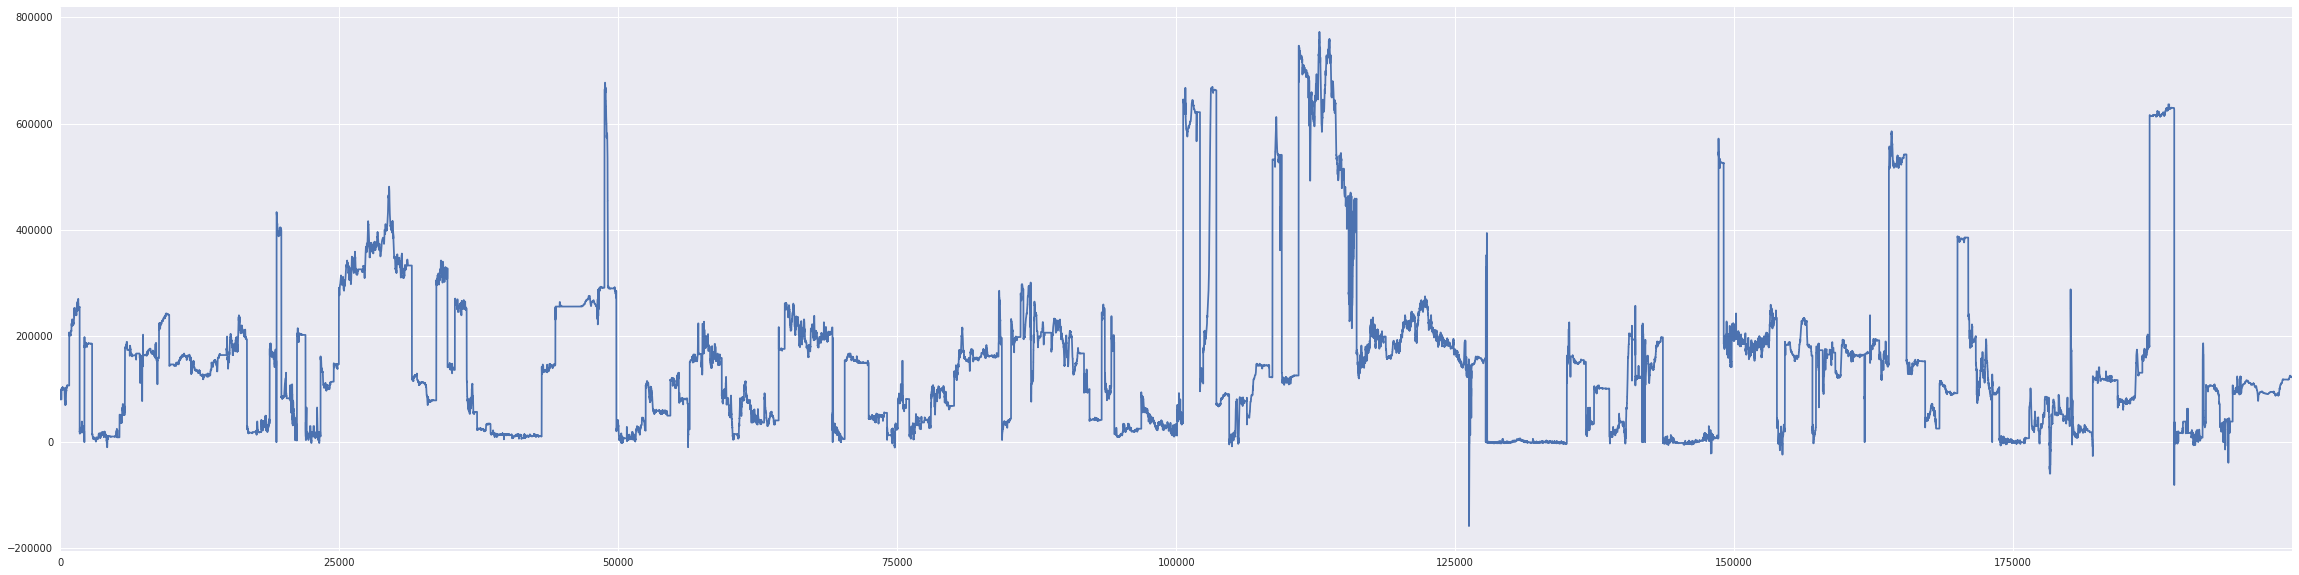

In [9]:
ip['Height'][:200000].plot()

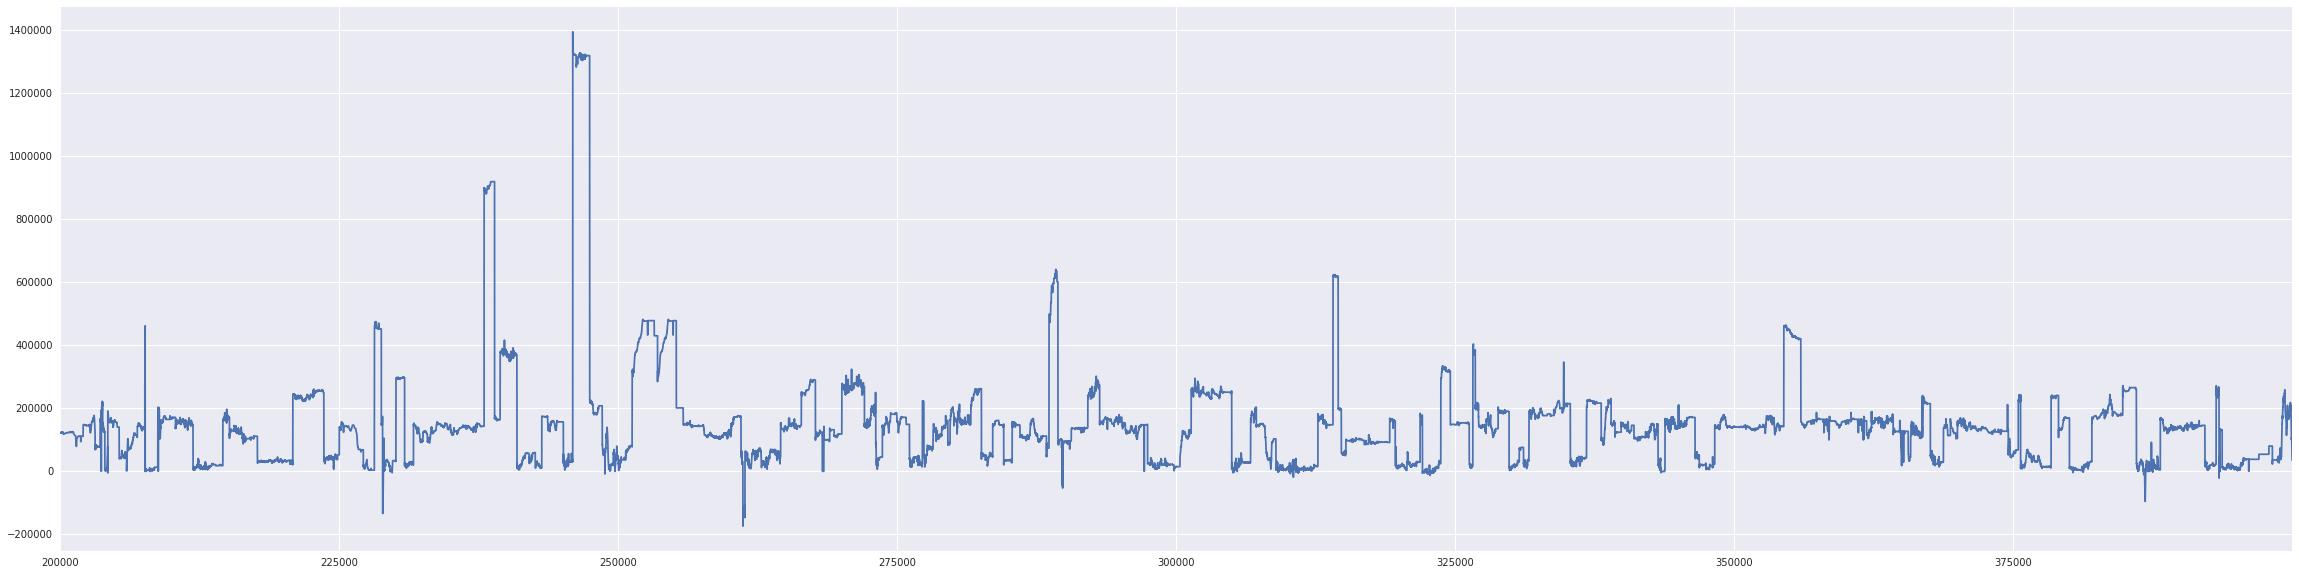

In [10]:
ip['Height'][200000:400000].plot()

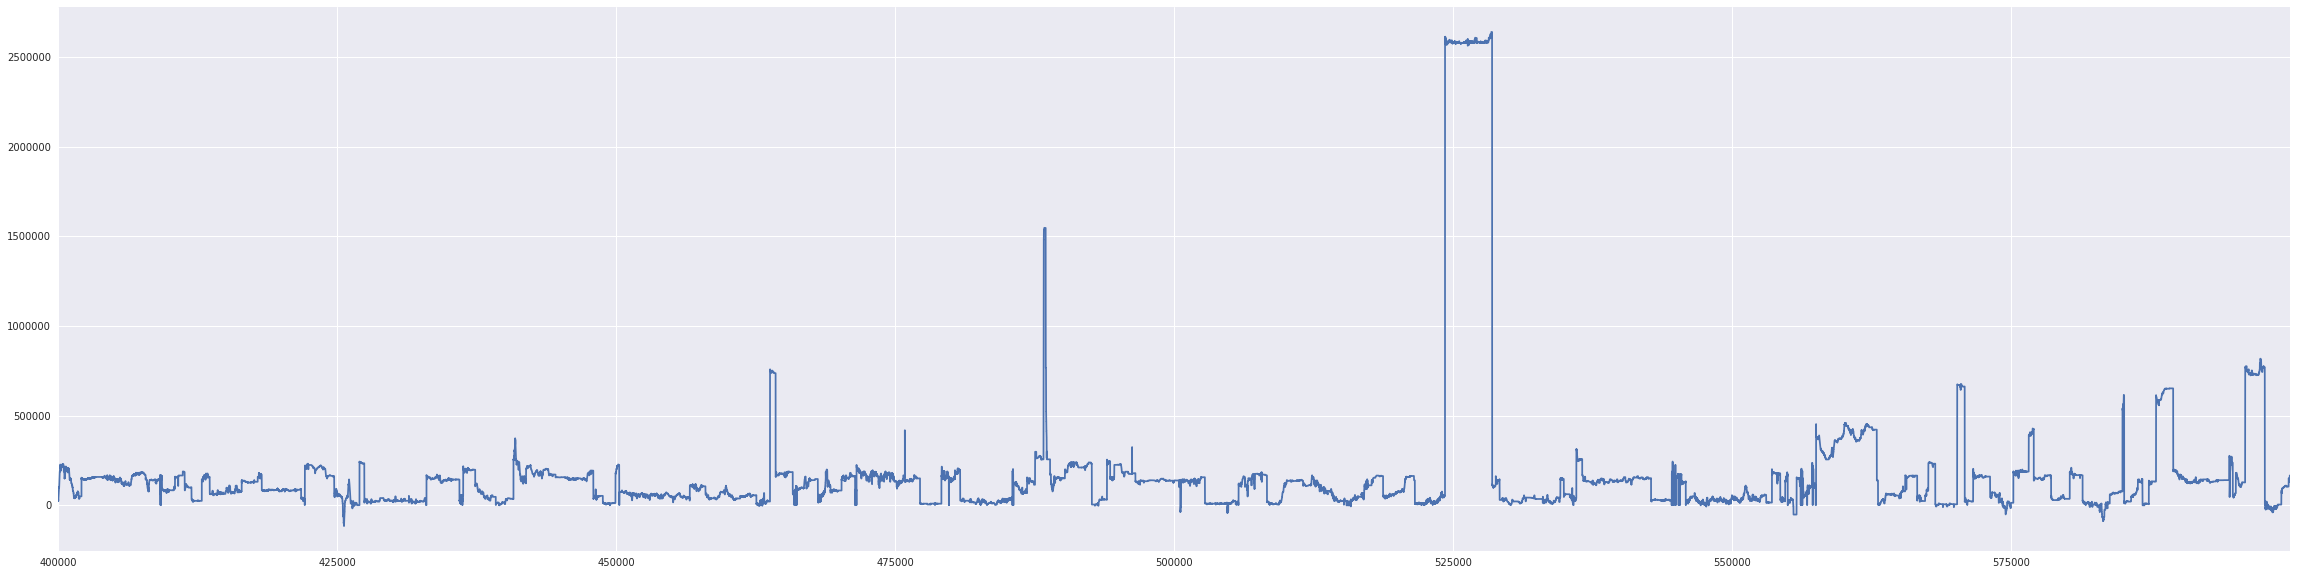

In [11]:
ip['Height'][400000:600000].plot()

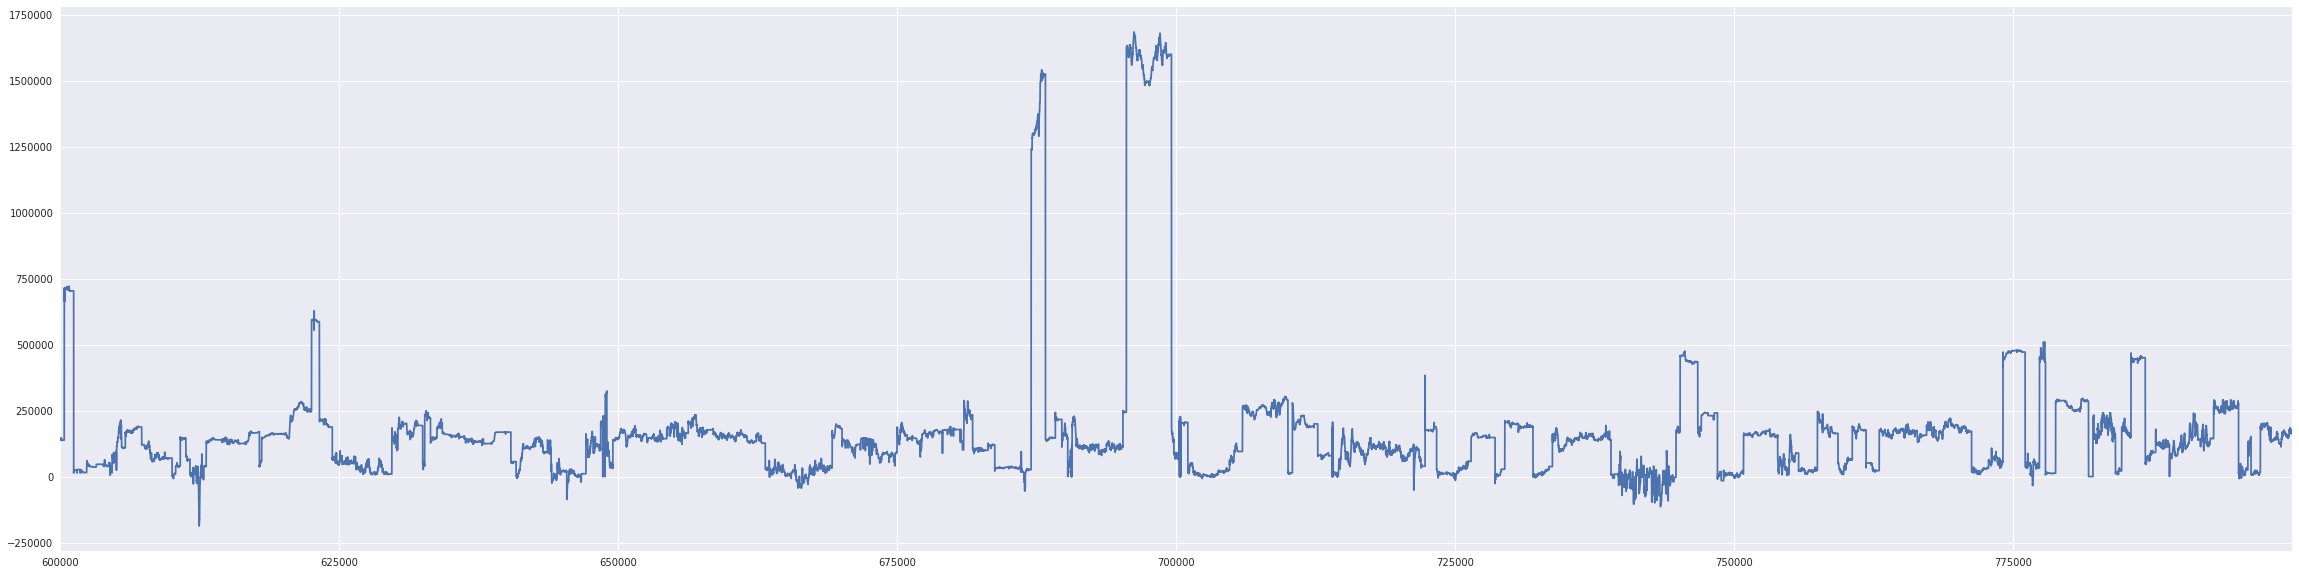

In [12]:
ip['Height'][600000:800000].plot()

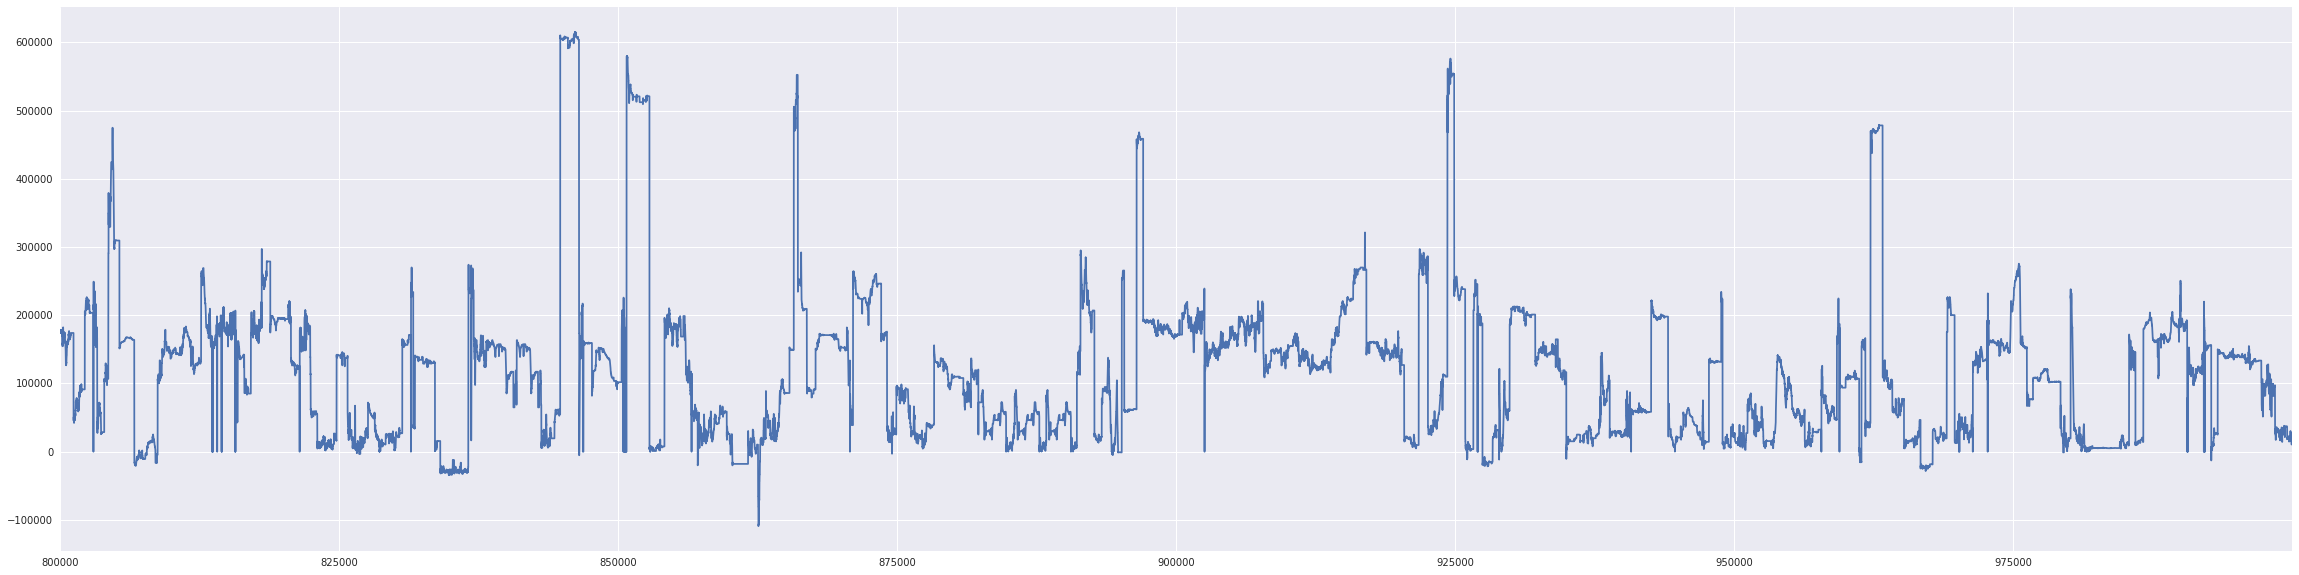

In [13]:
ip['Height'][800000:1000000].plot()

## **в переменной os (токен-платформа) удалим повторяющиеся элементы**
### **видим, что количество устройств обеих платформ примерно одинаковое**

Android    2293
iOS        2081
Name: os_version, dtype: int64


Text(0.5, 1.0, 'число устройств каждой платформы в os.csv')

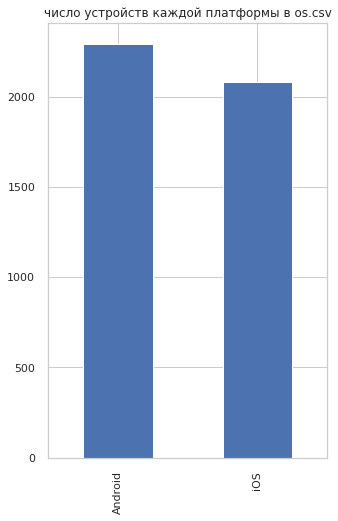

In [36]:
os = os[os['frequency'] == 1]
print(os['os_version'].value_counts())
os['os_version'].value_counts().plot(kind='bar', figsize=(5, 8))
plt.title("число устройств каждой платформы в os.csv")


количество треков на платформе iOS:  2312
количество треков на платформе Android:  1457


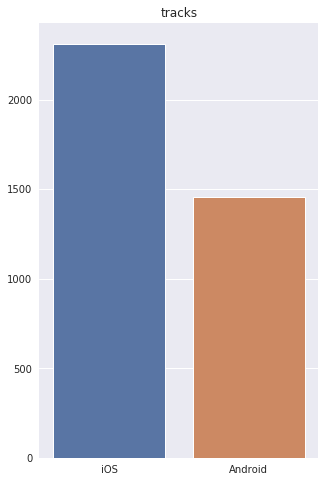

In [15]:
# посчитаем количество треков для каждой платформы
iOS = len(rt[rt['DeviceToken'].isin(os[os['os_version'] == 'iOS']['DeviceToken'])]['DeviceToken'])
Android = len(rt[rt['DeviceToken'].isin(os[os['os_version'] == 'Android']['DeviceToken'])]['DeviceToken'])
print('количество треков на платформе iOS: ', iOS)
print('количество треков на платформе Android: ' , Android)

plt.rcParams['figure.figsize'] = (5, 8)
data = pd.DataFrame({'iOS': [iOS],
                   'Android': [Android]})
plt.title("tracks")
sns.set(style='whitegrid')
ax = sns.barplot(data=data)

### **Не все токены устройств из `os.csv` используются**
### **Найдем, какой количество токенов каждой платформы из `os.csv` есть `rich_tracks_2.csv`**

количество уникальных токенов устройств на платформе iOS:  809
количество уникальных токенов устройств на платформе Android:  385


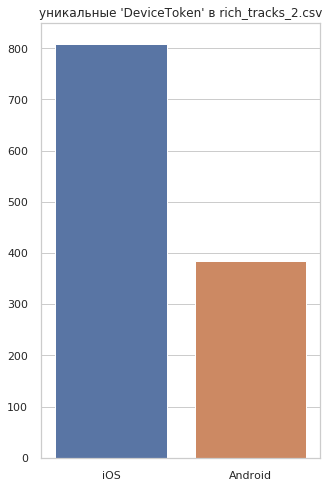

In [16]:

ios = rt[rt['DeviceToken'].isin(os[os['os_version'] == 'iOS']['DeviceToken'])]['DeviceToken'].nunique()
android = rt[rt['DeviceToken'].isin(os[os['os_version'] == 'Android']['DeviceToken'])]['DeviceToken'].nunique()

print('количество уникальных токенов устройств на платформе iOS: ', ios)
print('количество уникальных токенов устройств на платформе Android: ' , android)

plt.rcParams['figure.figsize'] = (5, 8)
data1 = pd.DataFrame({'iOS': [ios],
                   'Android': [android]})
sns.set(style='whitegrid')
plt.title("уникальные 'DeviceToken' в rich_tracks_2.csv")
ax = sns.barplot(data=data1)


## **Посмотрим на различия во входящих точках в зависимости от платформы**
## **Есть отличия в столбцах `Acceleration` и`Deceleration`**
## **В iOS в этих столбцах все значения нули**
## **Еще есть отличия в столбцах `AccelerationXOriginal`, `AccelerationYOriginal`, `AccelerationZOriginal`**
## **Далее дополнительно проанализируем эти столбцы**

In [17]:
# iOS
ip[ip['IncomingTrackId'].isin(rt[rt['DeviceToken'].isin(os[os['os_version'] == 'iOS']['DeviceToken'])]['IncomingTrackId'])]

,IncomingTrackId,Speed,Latitude,Longitude,PointDate,Height,Acceleration,Deceleration,TickTimestamp,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal
0,20702795,0.0,55.863077,52.227935,2019-10-17 15:35:23.0000000 +03:00,98084.0,0.0,0.0,1571315732,0.829803,0.322861,-0.154434
1,20702795,0.0,55.863077,52.227935,2019-10-17 15:35:23.0000000 +03:00,98084.0,0.0,0.0,1571315733,0.716080,0.612228,-0.168091
2,20702795,0.0,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315734,0.913208,0.488998,0.308365
3,20702795,0.0,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315735,0.930328,0.396133,-0.145203
4,20702795,0.0,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315736,0.887436,0.647537,0.245926
...,...,...,...,...,...,...,...,...,...,...,...,...
3789852,21499241,0.0,-27.494479,153.071056,2019-10-23 16:33:16.0000000 +10:00,21726.0,0.0,0.0,1571812538,-0.080307,-0.011932,0.991089
3789853,21499241,0.0,-27.494479,153.071056,2019-10-23 16:33:16.0000000 +10:00,21726.0,0.0,0.0,1571812539,-0.080658,-0.013153,0.992065
3789854,21499241,0.0,-27.494479,153.071056,2019-10-23 16:33:16.0000000 +10:00,21726.0,0.0,0.0,1571812540,-0.079666,-0.010666,0.992447
3789855,21499241,0.0,-27.494479,153.071056,2019-10-23 16:33:16.0000000 +10:00,21726.0,0.0,0.0,1571812541,-0.079239,-0.011368,0.991379


In [18]:
# iOS
ip[ip['IncomingTrackId'].isin(rt[rt['DeviceToken'].isin(os[os['os_version'] == 'iOS']['DeviceToken'])]['IncomingTrackId'])].describe()

,IncomingTrackId,Speed,Latitude,Longitude,Height,Acceleration,Deceleration,TickTimestamp,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal
count,2.948898e+06,2.948898e+06,2.948898e+06,2.948898e+06,2.948898e+06,2948898.0,2948898.0,2.948898e+06,2.948898e+06,2.948898e+06,2.948898e+06
mean,2.070764e+07,2.644464e+01,3.167980e+01,7.163040e+01,1.165136e+05,0.0,0.0,1.571309e+09,-2.116940e-02,-1.897677e-01,-3.519143e-01
std,2.014691e+05,3.192738e+01,3.558463e+01,4.443737e+01,1.358655e+05,0.0,0.0,1.244235e+05,4.180320e-01,5.970738e-01,5.841493e-01
min,1.988839e+07,0.000000e+00,-4.315735e+01,-1.563825e+02,-4.500000e+05,0.0,0.0,1.570343e+09,-6.521149e+00,-4.982590e+00,-6.352142e+00
25%,2.066554e+07,0.000000e+00,1.349222e+00,3.766626e+01,2.775800e+04,0.0,0.0,1.571302e+09,-1.731567e-01,-7.238922e-01,-8.685913e-01
50%,2.068527e+07,1.004400e+01,5.182208e+01,5.322817e+01,1.034690e+05,0.0,0.0,1.571308e+09,-8.193970e-03,-1.929932e-01,-4.740677e-01
75%,2.071867e+07,4.842000e+01,5.574673e+01,1.038675e+02,1.554990e+05,0.0,0.0,1.571314e+09,1.355286e-01,1.345673e-01,-3.631592e-03
max,2.149924e+07,2.235964e+02,6.936569e+01,1.586358e+02,3.087814e+06,0.0,0.0,1.571813e+09,4.982407e+00,7.627045e+00,8.325272e+00


In [19]:
# Android
ip[ip['IncomingTrackId'].isin(rt[rt['DeviceToken'].isin(os[os['os_version'] == 'Android']['DeviceToken'])]['IncomingTrackId'])]

,IncomingTrackId,Speed,Latitude,Longitude,PointDate,Height,Acceleration,Deceleration,TickTimestamp,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal
808,20691750,1.462336e+01,55.171671,61.373645,2019-10-17 17:35:29.0000000 +05:00,206800.0,0.793684,7.786039,1571333728,1.016339,8.920795,3.934870
809,20691750,1.441480e+01,55.171687,61.373590,2019-10-17 17:35:30.0000000 +05:00,206800.0,0.790284,7.752688,1571333729,1.268927,8.682572,4.011485
810,20691750,1.505162e+01,55.171720,61.373471,2019-10-17 17:35:32.0000000 +05:00,206800.0,0.840182,8.242188,1571333731,1.371878,9.311050,2.791639
811,20691750,1.480875e+01,55.171732,61.373406,2019-10-17 17:35:33.0000000 +05:00,206800.0,0.900146,8.830428,1571333732,1.626860,9.980229,2.644396
812,20691750,1.344887e+01,55.171739,61.373329,2019-10-17 17:35:33.0000000 +05:00,200600.0,0.862585,8.461963,1571333733,1.447295,9.297882,2.298434
...,...,...,...,...,...,...,...,...,...,...,...,...
3791235,21514828,5.010769e-15,48.774338,44.802745,2019-10-23 12:34:41.0000000 +04:00,28888.0,0.002899,0.028434,1571834081,-0.536301,5.410896,-7.910442
3791236,21514828,2.912739e-15,48.774338,44.802745,2019-10-23 12:34:42.0000000 +04:00,28921.0,0.001424,0.013966,1571834082,-0.536301,5.497087,-7.977480
3791237,21514828,9.111070e-16,48.774338,44.802745,2019-10-23 12:34:44.0000000 +04:00,28989.0,-0.001739,-0.017059,1571834084,-0.478840,5.458780,-7.929596
3791238,21514828,5.550616e-16,48.774338,44.802745,2019-10-23 12:34:45.0000000 +04:00,29025.0,-0.004315,-0.042333,1571834085,-0.430956,5.487510,-7.872135


In [20]:
# Android
ip[ip['IncomingTrackId'].isin(rt[rt['DeviceToken'].isin(os[os['os_version'] == 'Android']['DeviceToken'])]['IncomingTrackId'])].describe()

,IncomingTrackId,Speed,Latitude,Longitude,Height,Acceleration,Deceleration,TickTimestamp,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal
count,8.108930e+05,810893.000000,810893.000000,810893.000000,8.108930e+05,810893.000000,810893.000000,8.108930e+05,810893.000000,810893.000000,810893.000000
mean,2.068504e+07,32.290840,36.507147,62.441335,1.640676e+05,0.274842,0.526322,1.571329e+09,0.526826,2.230160,2.810326
std,3.020964e+05,32.835831,35.028219,45.993612,2.131807e+05,1.548633,2.353406,1.933233e+05,3.654420,5.332358,5.506206
min,1.989194e+07,0.000000,-38.206772,-90.543041,-2.800000e+05,-21.897650,-36.033807,1.570801e+09,-47.380302,-48.374844,-38.657963
25%,2.065892e+07,1.394428,46.320000,37.546207,7.169900e+04,-0.015007,-0.047912,1.571311e+09,-0.679124,-0.021548,0.000000
50%,2.067793e+07,22.290058,55.421604,39.115313,1.511000e+05,0.002794,0.034201,1.571324e+09,0.000000,1.249773,2.128021
75%,2.074853e+07,57.109814,55.857263,73.235616,1.915000e+05,0.163133,0.961186,1.571365e+09,1.333611,7.031895,8.001078
max,2.151483e+07,225.146297,69.497742,153.562202,2.641100e+06,25.490773,35.982261,1.571850e+09,41.495178,34.525444,41.205471


### **Найдем треки с самым большим количеством точек**
### **Для iOS это будут треки 20711954, 20706937, 20786886**
### **Для Android это будут треки 20854405, 20040222, 20681757**

In [21]:
ip[ip['IncomingTrackId'].isin(rt[rt['DeviceToken'].isin(os[os['os_version'] == 'iOS']['DeviceToken'])]['IncomingTrackId'])]['IncomingTrackId'].value_counts()

20711954    22909
20706937    20751
20786886    16475
20691304    15218
20775097    14792
            ...  
20700925       72
20668852       58
20665098       57
20674087       57
20681704       28
Name: IncomingTrackId, Length: 1616, dtype: int64

In [22]:
ios_track_0 = 20711954
ios_track_1 = 20706937
ios_track_2 = 20786886

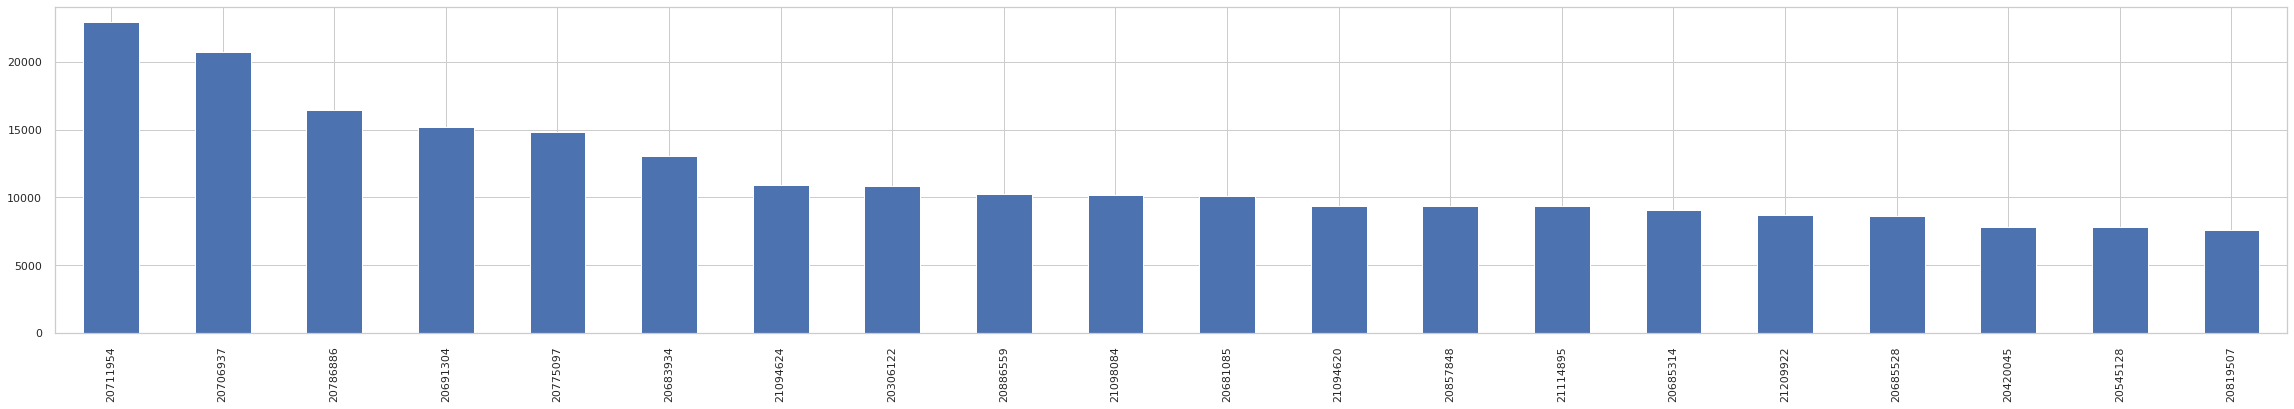

In [23]:
# на графике 20 треков с самым большим количеством точек на платформе iOS 
ip[ip['IncomingTrackId'].isin(rt[rt['DeviceToken'].isin(os[os['os_version'] == 'iOS']['DeviceToken'])]['IncomingTrackId'])]['IncomingTrackId'].value_counts()[:20].plot(kind='bar', figsize=(40, 6))

In [24]:
ip[ip['IncomingTrackId'].isin(rt[rt['DeviceToken'].isin(os[os['os_version'] == 'Android']['DeviceToken'])]['IncomingTrackId'])]['IncomingTrackId'].value_counts()

20854405    7433
20040222    7281
20681757    7168
21125916    6907
20965499    6504
            ... 
20675817      62
20656562      55
20655549      37
20686967      37
20658877      34
Name: IncomingTrackId, Length: 953, dtype: int64

In [25]:
android_track_0 = 20854405
android_track_1 = 20040222
android_track_2 = 20681757

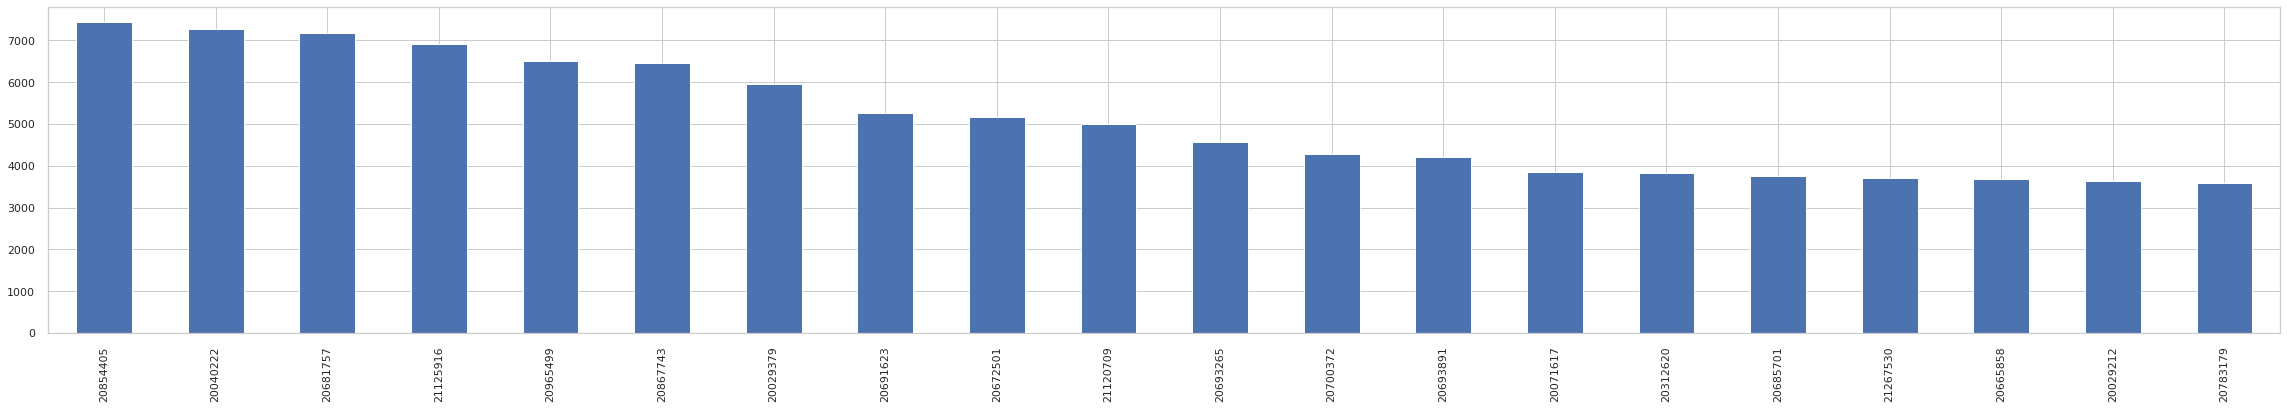

In [26]:
# на графике 20 треков с самым большим количеством точек на платформе Android
ip[ip['IncomingTrackId'].isin(rt[rt['DeviceToken'].isin(os[os['os_version'] == 'Android']['DeviceToken'])]['IncomingTrackId'])]['IncomingTrackId'].value_counts()[:20].plot(kind='bar', figsize=(40, 6))

## **Построим графики показаний акселерометра**
## **На одном графике один трек**
## **Каждый трек представлен 3 проекциями на координатные оси**
## **Первые три графика - показания iOS-устройства**
## **Вторые три графика - показания Android-устройства**

## **У iOS наблюдается, что значения ускорений сосредоточены в промежутке (-1, 0.5)**
## **У Android значения сосредоточены в промежутке (-10, 10), т.е. примерно в 10 раз больше**
## **Далее попробуем значения Android уменьшить ровно в 10 раз и построить аналогичные графики**

Text(0.5, 1.0, 'ios_track_0')

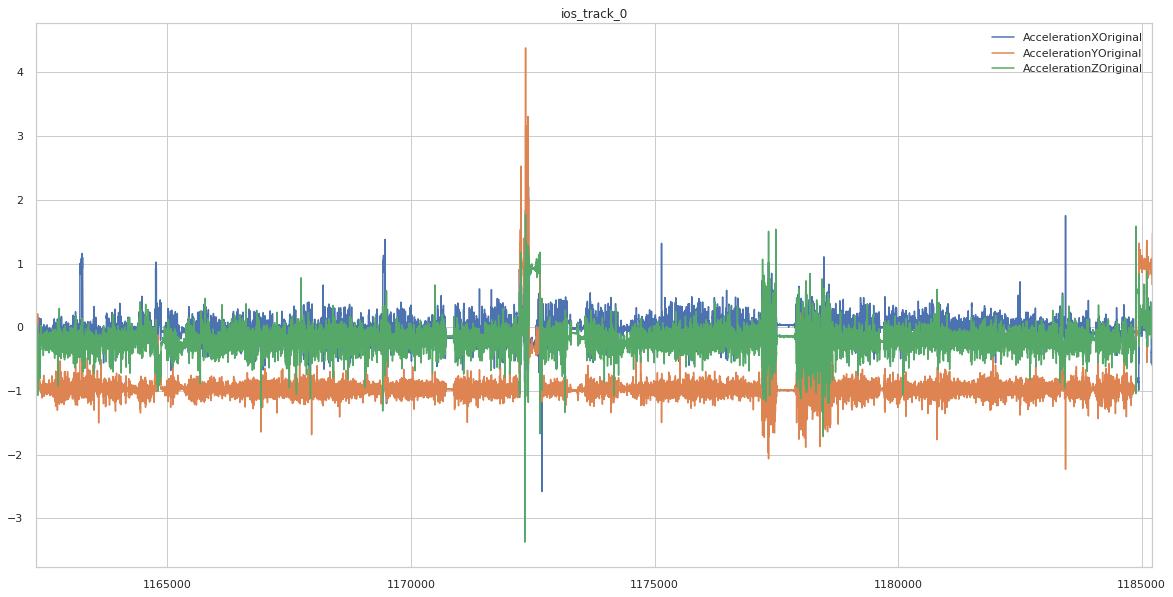

In [27]:
ip[ip['IncomingTrackId'] == ios_track_0]['AccelerationXOriginal'].plot(figsize=(20, 10))
ip[ip['IncomingTrackId'] == ios_track_0]['AccelerationYOriginal'].plot(figsize=(20, 10))
ip[ip['IncomingTrackId'] == ios_track_0]['AccelerationZOriginal'].plot(figsize=(20, 10))
plt.legend()
plt.title("ios_track_0")

Text(0.5, 1.0, 'ios_track_1')

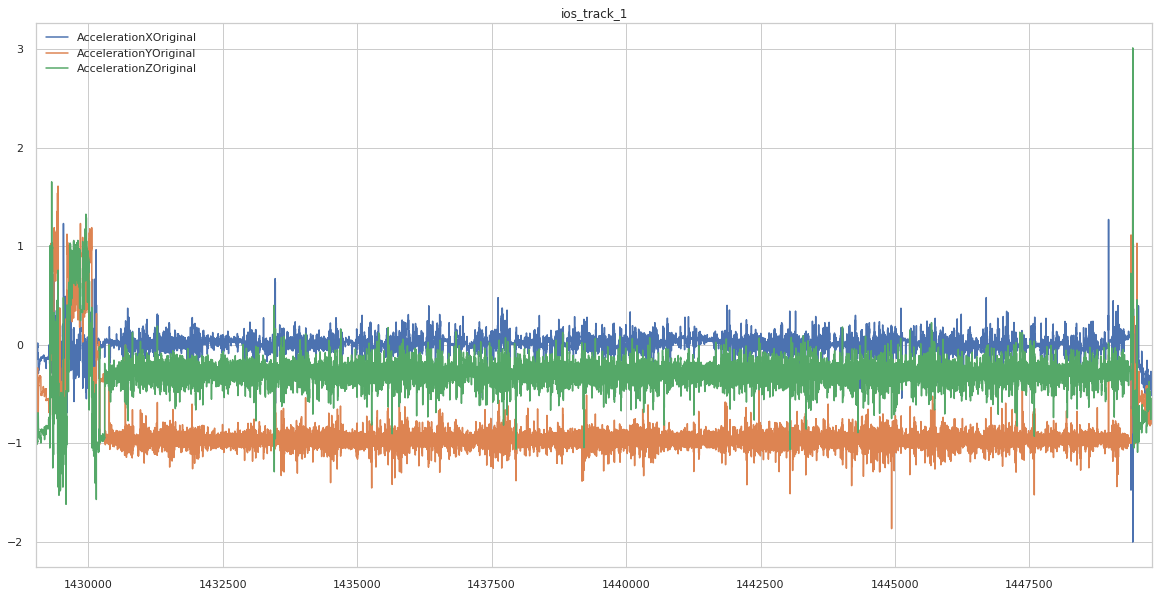

In [28]:
ip[ip['IncomingTrackId'] == ios_track_1]['AccelerationXOriginal'].plot(figsize=(20, 10))
ip[ip['IncomingTrackId'] == ios_track_1]['AccelerationYOriginal'].plot(figsize=(20, 10))
ip[ip['IncomingTrackId'] == ios_track_1]['AccelerationZOriginal'].plot(figsize=(20, 10))
plt.legend()
plt.title("ios_track_1")

Text(0.5, 1.0, 'ios_track_2')

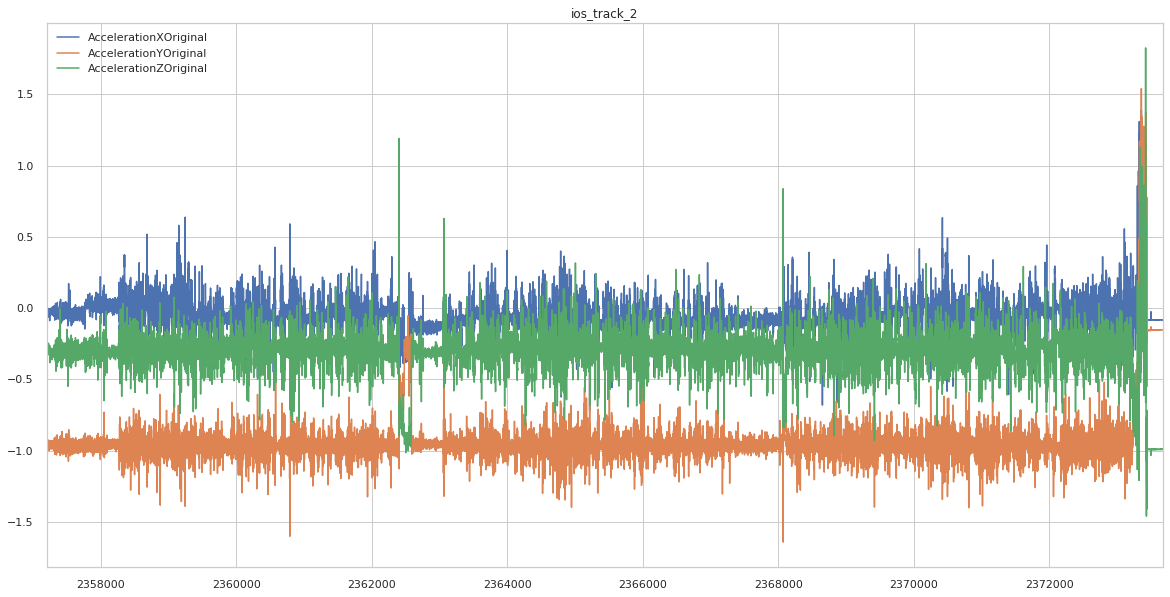

In [29]:
ip[ip['IncomingTrackId'] == ios_track_2]['AccelerationXOriginal'].plot(figsize=(20, 10))
ip[ip['IncomingTrackId'] == ios_track_2]['AccelerationYOriginal'].plot(figsize=(20, 10))
ip[ip['IncomingTrackId'] == ios_track_2]['AccelerationZOriginal'].plot(figsize=(20, 10))
plt.legend()
plt.title("ios_track_2")

Text(0.5, 1.0, 'android_track_0')

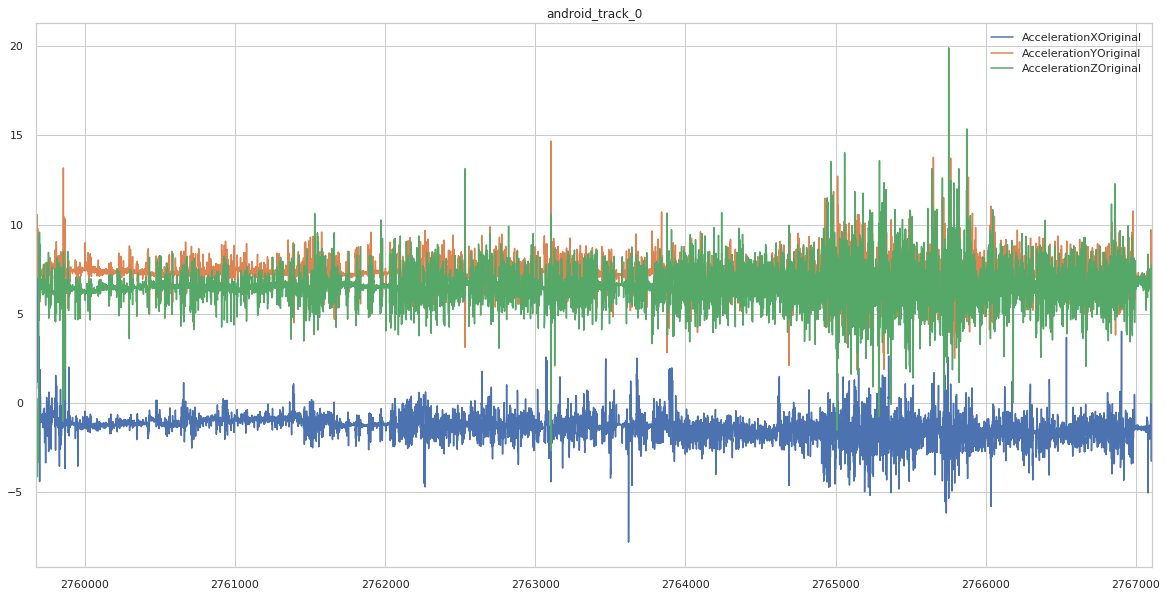

In [30]:
ip[ip['IncomingTrackId'] == android_track_0]['AccelerationXOriginal'].plot(figsize=(20, 10))
ip[ip['IncomingTrackId'] == android_track_0]['AccelerationYOriginal'].plot(figsize=(20, 10))
ip[ip['IncomingTrackId'] == android_track_0]['AccelerationZOriginal'].plot(figsize=(20, 10))
plt.legend()
plt.title("android_track_0")

Text(0.5, 1.0, 'android_track_1')

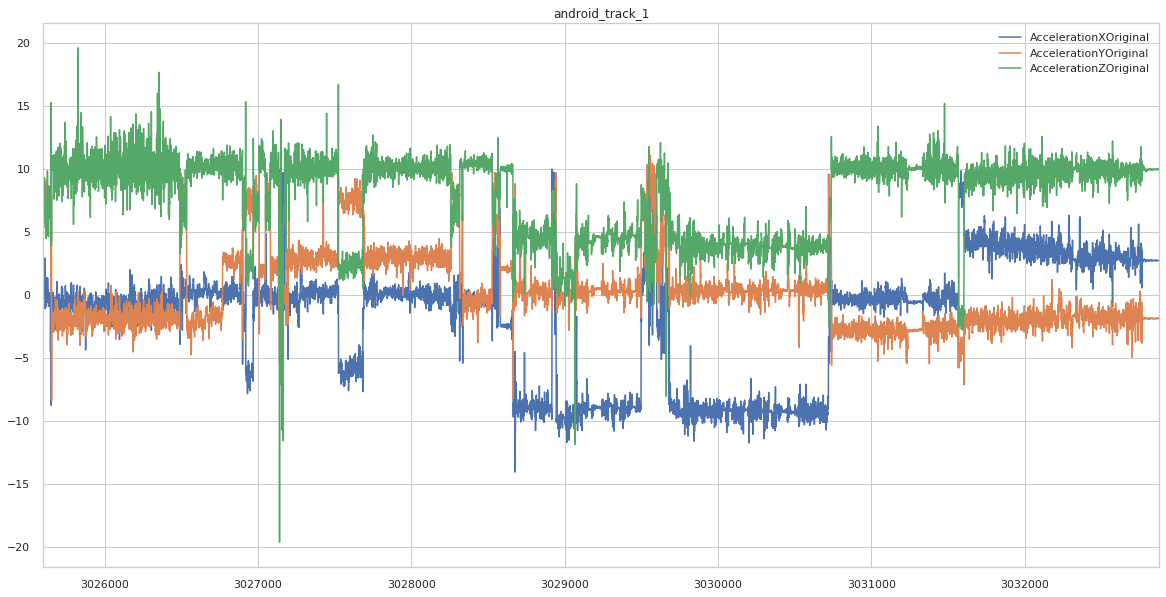

In [31]:
ip[ip['IncomingTrackId'] == android_track_1]['AccelerationXOriginal'].plot(figsize=(20, 10))
ip[ip['IncomingTrackId'] == android_track_1]['AccelerationYOriginal'].plot(figsize=(20, 10))
ip[ip['IncomingTrackId'] == android_track_1]['AccelerationZOriginal'].plot(figsize=(20, 10))
plt.legend()
plt.title("android_track_1")

Text(0.5, 1.0, 'android_track_2')

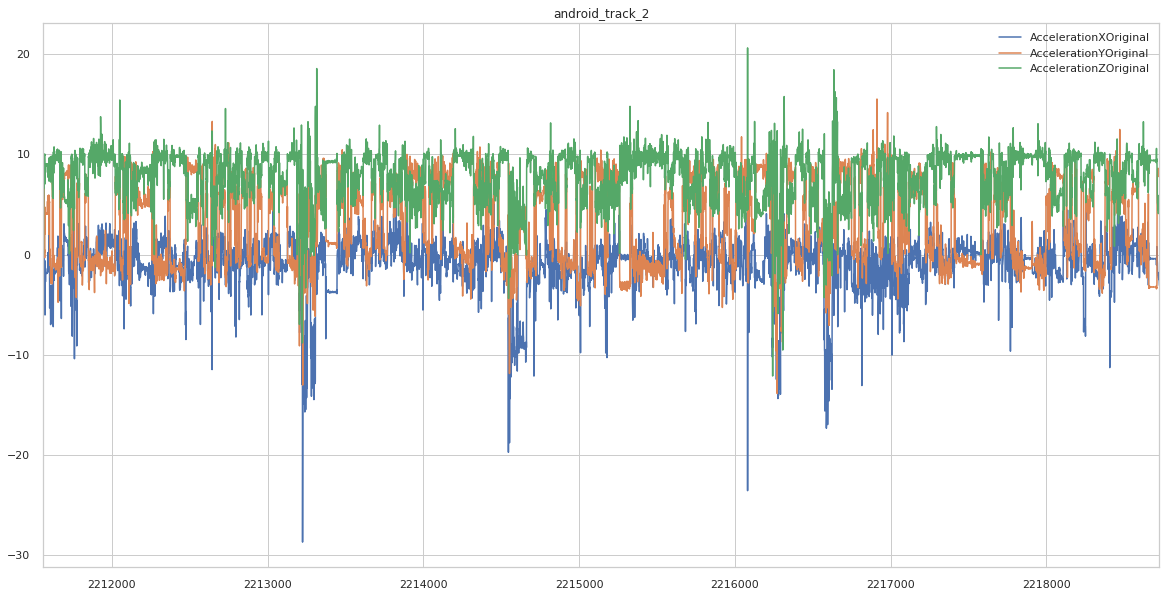

In [32]:
ip[ip['IncomingTrackId'] == android_track_2]['AccelerationXOriginal'].plot(figsize=(20, 10))
ip[ip['IncomingTrackId'] == android_track_2]['AccelerationYOriginal'].plot(figsize=(20, 10))
ip[ip['IncomingTrackId'] == android_track_2]['AccelerationZOriginal'].plot(figsize=(20, 10))
plt.legend()
plt.title("android_track_2")

## **После уменьшения значений ускорений в 10 раз наблюдаем, что графики Android выглядят как iOS**

Text(0.5, 1.0, 'android_track_0')

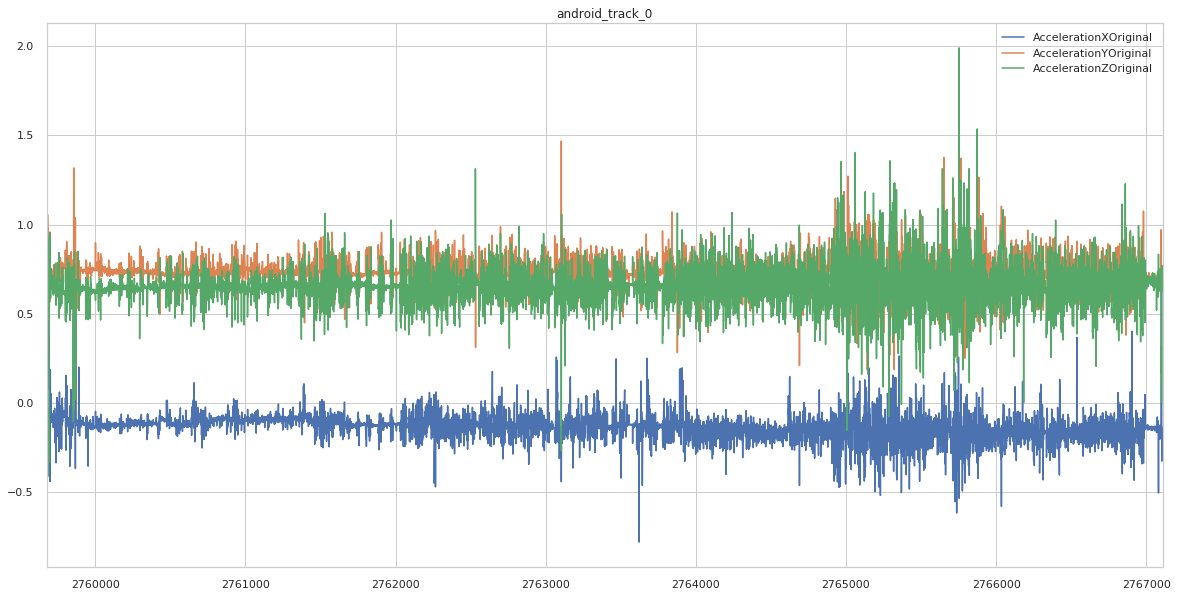

In [33]:
(ip[ip['IncomingTrackId'] == android_track_0]['AccelerationXOriginal']*0.1).plot(figsize=(20, 10))
(ip[ip['IncomingTrackId'] == android_track_0]['AccelerationYOriginal']*0.1).plot(figsize=(20, 10))
(ip[ip['IncomingTrackId'] == android_track_0]['AccelerationZOriginal']*0.1).plot(figsize=(20, 10))
plt.legend()
plt.title("android_track_0")

Text(0.5, 1.0, 'android_track_1')

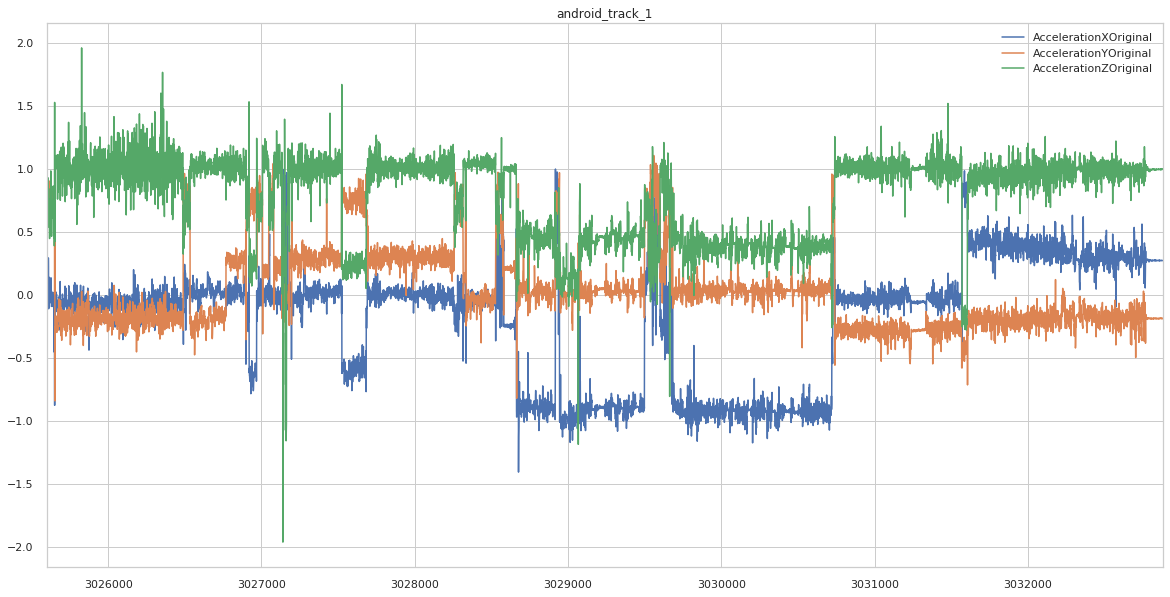

In [34]:
(ip[ip['IncomingTrackId'] == android_track_1]['AccelerationXOriginal']*0.1).plot(figsize=(20, 10))
(ip[ip['IncomingTrackId'] == android_track_1]['AccelerationYOriginal']*0.1).plot(figsize=(20, 10))
(ip[ip['IncomingTrackId'] == android_track_1]['AccelerationZOriginal']*0.1).plot(figsize=(20, 10))
plt.legend()
plt.title("android_track_1")

Text(0.5, 1.0, 'android_track_2')

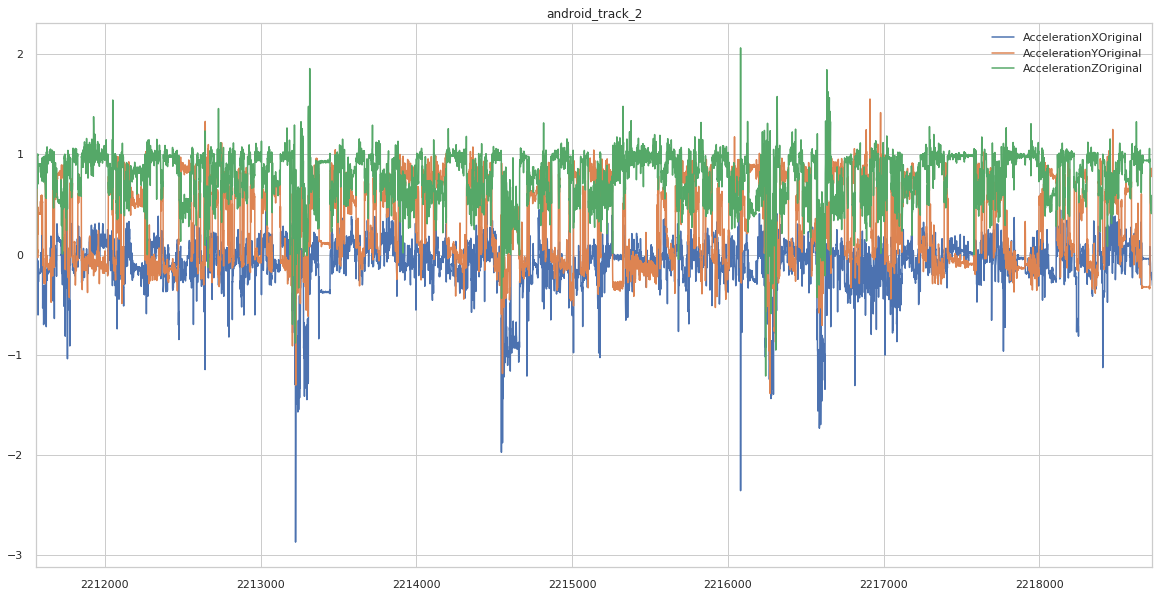

In [35]:
(ip[ip['IncomingTrackId'] == android_track_2]['AccelerationXOriginal']*0.1).plot(figsize=(20, 10))
(ip[ip['IncomingTrackId'] == android_track_2]['AccelerationYOriginal']*0.1).plot(figsize=(20, 10))
(ip[ip['IncomingTrackId'] == android_track_2]['AccelerationZOriginal']*0.1).plot(figsize=(20, 10))
plt.legend()
plt.title("android_track_2")